In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
x = torch.tensor([5,4,6])
x

tensor([5, 4, 6])

In [3]:
x * x

tensor([25, 16, 36])

In [4]:
M = torch.rand((5))
#(x, y) ---> x is vector of size 5, y is vector of a single value
def f(x):
    return torch.dot(M, x)

# Create data points
data = []
for i in range(100):
    x = torch.rand(5)
    data.append((x, f(x)))
    
# Display M
M

tensor([0.5041, 0.1773, 0.5339, 0.6243, 0.0932])

In [5]:
M_guess = torch.nn.Parameter(torch.rand(5), requires_grad=True)
M_guess

Parameter containing:
tensor([0.0597, 0.9499, 0.5980, 0.8026, 0.9379], requires_grad=True)

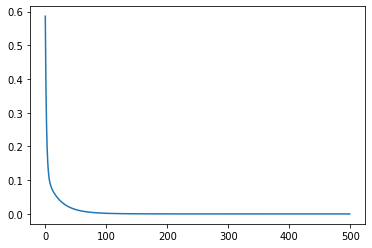

In [6]:
lr = 0.001
time_series = []
for epoch in range(500):
    errors = []
    for inp, actual_val in data:
        pred_val = torch.dot(M_guess, inp)
        error = (pred_val - actual_val)**2
        errors.append(error.item())
        error.backward()

        M_guess.data = M_guess.data - lr * M_guess.grad
        M_guess.grad.zero_()
    time_series.append(sum(errors)/len(errors))
plt.plot(time_series)